# ProgArchives ratings analysis

## Introduction

How many Pink Floyd albums are on the ProgArchives TOP list? Which prog rock subgenre has the highest average in the top 250?

In this analysis, we use the dataset obtained from web scraping and analyze it to get insights and answer all our curiosity about the progressive rock.
 
Asking Questions

We are interested to know:

    Q1: How many Pink Floyd albums are on the ProgArchives TOP 100 list?
    Q2: Which prog rock subgenre has the highest average in the top 100?
    Q3: Which albums have the highest ratings?
    Q4: What is the observed frequency of each genre?
    Q5: Which are the top 5 albums that have the highest average ratings? And the genre?
    Q6: What is the proportion of genres in the first 5 years of the dataset?

## Data Wrangling

We will prepare the environment. Subsequently, we also clean and process the data for analysis.

In [1]:
# Modules to create a dataframe, to plot and mathematical functions.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 
%matplotlib inline 

In [2]:
# Import data into pandas Dataframe.
prog_archives = pd.read_csv('data/raw_data/raw_top_250_progarchives.csv', delimiter = ',')
prog_archives.head()

,artist,album,rating,QWR,genre,year
0,Yes,Close to the Edge,4.68,QWR = 4.6663,Symphonic Prog,"Studio, 1972"
1,Genesis,Selling England by the Pound,4.65,QWR = 4.6355,Symphonic Prog,"Studio, 1973"
2,Pink Floyd,Wish You Were Here,4.64,QWR = 4.6266,Psychedelic/Space Rock,"Studio, 1975"
3,King Crimson,In the Court of the Crimson King,4.64,QWR = 4.6255,Eclectic Prog,"Studio, 1969"
4,Jethro Tull,Thick as a Brick,4.63,QWR = 4.6218,Prog Folk,"Studio, 1972"


In [3]:
# Information about a prog_archives dataframe including the index dtype and columns, non-null values and memory usage.
prog_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   artist  250 non-null    object 
 1   album   250 non-null    object 
 2   rating  250 non-null    float64
 3   QWR     250 non-null    object 
 4   genre   250 non-null    object 
 5   year    250 non-null    object 
dtypes: float64(1), object(5)
memory usage: 11.8+ KB


In [4]:
# Check for duplicates
prog_archives.duplicated().sum()

0

In [5]:
# Check null values
prog_archives.isnull().sum()

artist    0
album     0
rating    0
QWR       0
genre     0
year      0
dtype: int64

In [6]:
# Verifying if there is any wrong artist name.
prog_archives.artist.unique()

array(['Yes', 'Genesis', 'Pink Floyd', 'King Crimson', 'Jethro Tull',
       'Van Der Graaf Generator', 'Camel',
       'Premiata Forneria Marconi (PFM)', 'Rush',
       'Banco Del Mutuo Soccorso', 'Änglagård', 'Frank Zappa',
       'Gentle Giant', 'Miles Davis', 'Harmonium', 'Wobbler',
       'Mahavishnu Orchestra', 'Caravan', 'Dream Theater',
       'Museo Rosenbach', 'Renaissance', 'Supertramp', 'Steven Wilson',
       'Peter Hammill', 'Mike Oldfield', 'Porcupine Tree', 'Opeth',
       'Gorguts', 'Robert Wyatt', 'Return To Forever', 'Magma',
       'Bacamarte', 'Eskaton', 'All Traps On Earth', 'Marillion', 'Khan',
       'Hatfield And The North', 'Gong', 'Death', 'Focus', 'Area',
       'Steve Hackett', 'Edge Of Sanity', 'Emerson Lake & Palmer',
       'Riverside', 'Billy Cobham', 'National Health', 'Cardiacs',
       'Le Orme', 'IQ', 'Al Di Meola', 'Maxophone', 'Bubu',
       'Pain Of Salvation', 'Queensrÿche', 'Nucleus',
       'Il Balletto Di Bronzo', 'Tangerine Dream', 'Tool', '

In [7]:
# Verifying if there is any wrong album name.
prog_archives.album.unique()

array(['Close to the Edge', 'Selling England by the Pound',
       'Wish You Were Here', 'In the Court of the Crimson King',
       'Thick as a Brick', 'The Dark Side of the Moon', 'Foxtrot', 'Red',
       'Animals', 'Godbluff', 'Fragile', 'Pawn Hearts',
       "Larks' Tongues in Aspic", 'Nursery Cryme', 'Mirage',
       'Per Un Amico', 'Moonmadness', 'Moving Pictures', 'Relayer',
       'Darwin!', 'Hemispheres', 'Aqualung', 'Io Sono Nato Libero',
       'Hybris', 'Hot Rats', 'In a Glass House', 'Kind of Blue',
       "Si on avait besoin d'une cinquième saison", 'A Farewell to Kings',
       'Storia Di Un Minuto', 'From Silence to Somewhere',
       'H To He, Who Am The Only One', 'Birds of Fire', 'The Yes Album',
       'In the Land of Grey and Pink',
       'Metropolis Part 2 - Scenes from a Memory', 'Octopus',
       'Zarathustra', 'Scheherazade and Other Stories',
       'Images and Words', 'Crime of the Century',
       'The Lamb Lies Down on Broadway', 'The Power and the Glory',


In [8]:
# Convert rating column into float type.
prog_archives["rating"] = prog_archives["rating"].astype('float')

# Extracting 'QWR = ' from QWR column.
prog_archives["QWR"] =  prog_archives["QWR"].astype(str).str.extract('(.{6}$)')

# Convert QWR column into float type.
prog_archives["QWR"] = prog_archives["QWR"].astype('float')

# Removing 'Studio, ' from year column.
prog_archives["year"] =  prog_archives["year"].astype(str).str.extract('(.{4}$)')

In [9]:
# Verifying if there is any wrong genre name.
prog_archives.genre.unique()

array(['Symphonic Prog', 'Psychedelic/Space Rock', 'Eclectic Prog',
       'Prog Folk', 'Rock Progressivo Italiano', 'Heavy Prog',
       'RIO/Avant-Prog', 'Jazz Rock/Fusion', 'Canterbury Scene',
       'Progressive Metal', 'Crossover Prog', 'Tech/Extreme Prog Metal',
       'Zeuhl', 'Neo-Prog', 'Progressive Electronic',
       'Experimental/Post Metal'], dtype=object)

In [10]:
# Processed dataframe.
prog_archives.head()

,artist,album,rating,QWR,genre,year
0,Yes,Close to the Edge,4.68,4.6663,Symphonic Prog,1972
1,Genesis,Selling England by the Pound,4.65,4.6355,Symphonic Prog,1973
2,Pink Floyd,Wish You Were Here,4.64,4.6266,Psychedelic/Space Rock,1975
3,King Crimson,In the Court of the Crimson King,4.64,4.6255,Eclectic Prog,1969
4,Jethro Tull,Thick as a Brick,4.63,4.6218,Prog Folk,1972


In [11]:
# Save the processed datafram into csv file.
prog_archives.to_csv('data/processed_data/top_250_progarchives.csv', sep = ',', index=False, encoding='utf-8')

## Exploratory Data Analysis

count    250.000000
mean       4.270600
std        0.098426
min        4.130000
25%        4.210000
50%        4.255000
75%        4.310000
max        4.680000
Name: rating, dtype: float64

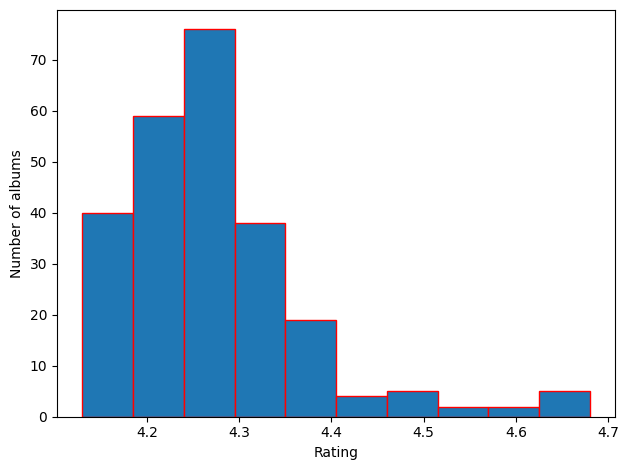

In [12]:
# Histogram of rating and descriptive statistics.
plt.hist(prog_archives.rating, edgecolor="red", bins=10)
plt.xlabel("Rating")
plt.ylabel("Number of albums")
plt.xticks(np.arange(4.2, 4.8, 0.1))
plt.tight_layout()
plt.savefig('figures/histogram_rating.pdf', dpi=800)

prog_archives.rating.describe()

As we can observe a skewed distribution to the right, the median is the most recommended measure of central tendency. This valor is 4.255.

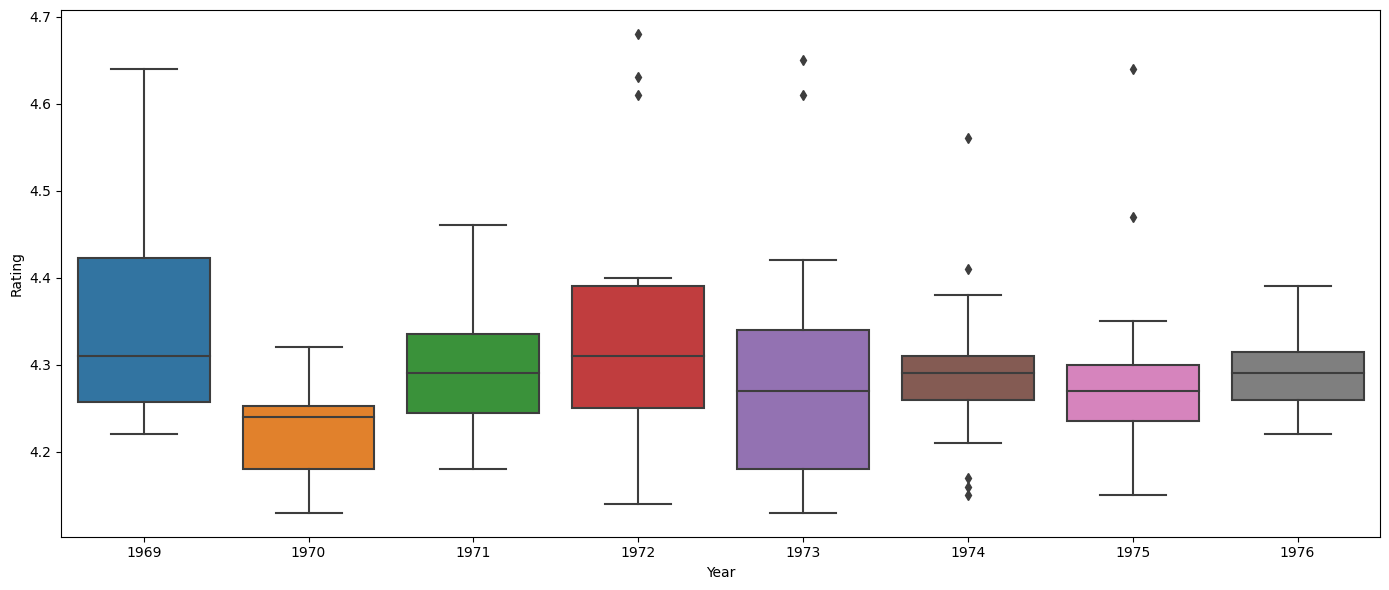

In [13]:
# Access a group of rows and columns of classic-Era 1969 to 1976
classic_era = prog_archives.loc[(prog_archives.year >= '1969') & (prog_archives.year <= '1976'), ['artist', 'album', 'rating', 'year']]
classic_era.sort_values(by='year', inplace=True)

plt.figure(figsize=(14,6))

sns.boxplot(data=classic_era, x='year',y='rating')
plt.tight_layout()
plt.xlabel('Year')
plt.ylabel('Rating')

plt.savefig('figures/boxplots.pdf', dpi=800)

plt.show()

classic_era.reset_index(drop=True, inplace=True)

These plots show the positions of the central 50% of the data, the position of the median, the outliers, as well as allowing an evaluation of the symmetry of the distribution. We can see that 1972, 1973, 1974, 1975 have outliers. Let's identify which are the albums that have this type of behavior using the interquartile distance. The interquartile distance can be obtain from describe method using the values of first and third quartiles. 

In [14]:
# Calculating the lower and upper bounds of the interquartile range.
def outliers(year):
    summary = classic_era.loc[(classic_era.year == year)].describe()
    iqr = summary.loc['75%'].values  - summary.loc['25%'].values 
    lower_bound = summary.loc['25%'].values  - iqr * 1.5 
    upper_bound = summary.loc['75%'].values  + iqr * 1.5 
    return lower_bound[0], upper_bound[0]

# We can obtain the albuns that are outliers in 1972.
classic_era.loc[(classic_era.year == '1972') & (classic_era.rating > outliers('1972')[1])]

,artist,album,rating,year
28,Jethro Tull,Thick as a Brick,4.63,1972
29,Genesis,Foxtrot,4.61,1972
40,Yes,Close to the Edge,4.68,1972


In [15]:
# Summary of descriptive statistics of the classic era.
classic_era.groupby('year').describe()

rating                                                      
      count      mean       std   min     25%   50%     75%   max
year                                                             
1969    4.0  4.370000  0.187794  4.22  4.2575  4.31  4.4225  4.64
1970    8.0  4.222500  0.062278  4.13  4.1800  4.24  4.2525  4.32
1971   15.0  4.300667  0.084555  4.18  4.2450  4.29  4.3350  4.46
1972   17.0  4.347647  0.153766  4.14  4.2500  4.31  4.3900  4.68
1973   19.0  4.294737  0.143425  4.13  4.1800  4.27  4.3400  4.65
1974   18.0  4.295000  0.098115  4.15  4.2600  4.29  4.3100  4.56
1975   19.0  4.287895  0.109168  4.15  4.2350  4.27  4.3000  4.64
1976    7.0  4.292857  0.057941  4.22  4.2600  4.29  4.3150  4.39

## Asking Questions

### Q1: How many Pink Floyd albums are on the ProgArchives TOP 250 list?

In [16]:
prog_archives.groupby('artist').get_group('Pink Floyd')

,artist,album,rating,QWR,genre,year
2,Pink Floyd,Wish You Were Here,4.64,4.6266,Psychedelic/Space Rock,1975
5,Pink Floyd,The Dark Side of the Moon,4.61,4.5999,Psychedelic/Space Rock,1973
8,Pink Floyd,Animals,4.53,4.5190,Psychedelic/Space Rock,1977
43,Pink Floyd,Meddle,4.30,4.2880,Psychedelic/Space Rock,1971


In top 250 we have 4 albums of Pink Floyd.

### Q2: Which progressive rock subgenre has the highest average in the top 250?

In [17]:
top100 = prog_archives.groupby('genre')['rating'].describe()
top100.sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Psychedelic/Space Rock,7.0,4.402857,0.188035,4.20,4.2500,4.340,4.570,4.64
RIO/Avant-Prog,20.0,4.303500,0.057881,4.21,4.2775,4.300,4.330,4.47
Eclectic Prog,34.0,4.294706,0.116859,4.13,4.2125,4.270,4.335,4.64
Symphonic Prog,44.0,4.291364,0.130626,4.14,4.2000,4.260,4.335,4.68
Prog Folk,9.0,4.284444,0.146979,4.16,4.2100,4.230,4.350,4.63
Rock Progressivo Italiano,18.0,4.273333,0.067737,4.18,4.2225,4.250,4.325,4.40
Zeuhl,6.0,4.271667,0.051153,4.23,4.2425,4.255,4.275,4.37
Jazz Rock/Fusion,27.0,4.269259,0.046071,4.18,4.2400,4.270,4.290,4.36
Heavy Prog,11.0,4.250909,0.084434,4.13,4.1900,4.260,4.305,4.38


In the top 250, Psychedelic/Space Rock has highest average, $\mu = 4.40$ with 7 albums. Symphonic Prog with 44 albums has $\mu = 4.29$.

### Q3: Which albums have the highest ratings?

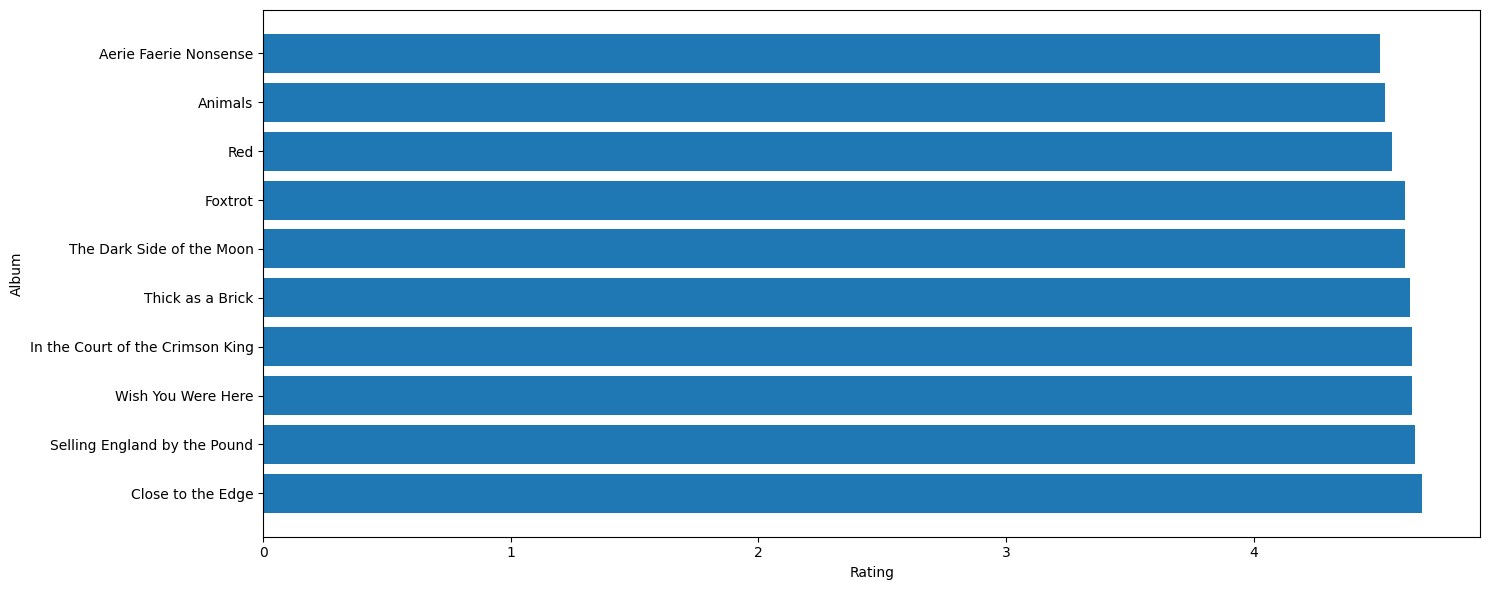

In [18]:
plt.figure(figsize=(15,6))

top10 = prog_archives.nlargest(10,'rating')
top10.index = top10.album

plt.barh(top10.album, top10.rating)
plt.xlabel('Rating')
plt.ylabel('Album')

plt.tight_layout()

plt.savefig('figures/high_ratings.pdf', dpi=800)
plt.show()

### Q4: What is the observed frequency of each genre?

In [19]:
observed_frequency = prog_archives.genre.value_counts().sort_values(ascending=False)
relative_frequency = prog_archives.genre.value_counts(normalize = True)*100
cumulative_frequency = prog_archives.genre.value_counts().cumsum()
total = [observed_frequency.sum(), relative_frequency.sum(), '-']

nd = {'observed_frequency': observed_frequency, 'relative_frequency': relative_frequency, 'cumulative_frequency': cumulative_frequency}
new_df = pd.DataFrame(nd, index = observed_frequency.index)

new_df

,observed_frequency,relative_frequency,cumulative_frequency
Symphonic Prog,44,17.6,44
Eclectic Prog,34,13.6,78
Jazz Rock/Fusion,27,10.8,105
RIO/Avant-Prog,20,8.0,125
Rock Progressivo Italiano,18,7.2,143
Crossover Prog,15,6.0,158
Tech/Extreme Prog Metal,15,6.0,173
Canterbury Scene,13,5.2,186
Progressive Metal,13,5.2,199
Heavy Prog,11,4.4,210


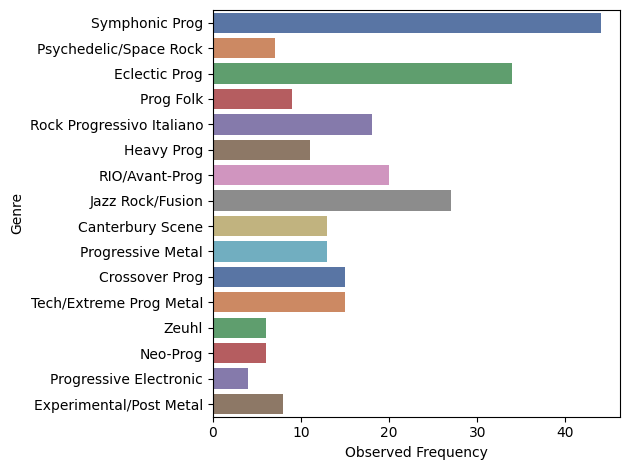

In [20]:
cp = sns.countplot(data=prog_archives, y='genre', palette='deep')
cp.set_xlabel("Observed Frequency")
cp.set_ylabel("Genre")
plt.tight_layout()

plt.savefig('figures/observed_frequency.pdf', dpi=800)
plt.show()

### Q5: Which are the top 5 artist that have the highest average ratings? 

In [21]:
prog_archives.groupby('artist')['rating'].describe().sort_values(ascending=False, by='mean').head(5)

,count,mean,std,min,25%,50%,75%,max
artist,,,,,,,,
Pink Floyd,4.0,4.520000,0.153840,4.30,4.4725,4.570,4.6175,4.64
Plat Du Jour,1.0,4.470000,NaN,4.47,4.4700,4.470,4.4700,4.47
Art Zoyd,1.0,4.470000,NaN,4.47,4.4700,4.470,4.4700,4.47
Yes,4.0,4.457500,0.160494,4.31,4.3625,4.420,4.5150,4.68
Genesis,6.0,4.401667,0.195593,4.15,4.2925,4.355,4.5600,4.65


### Q6: What is the proportion of genres in the first 5 years of the dataset?

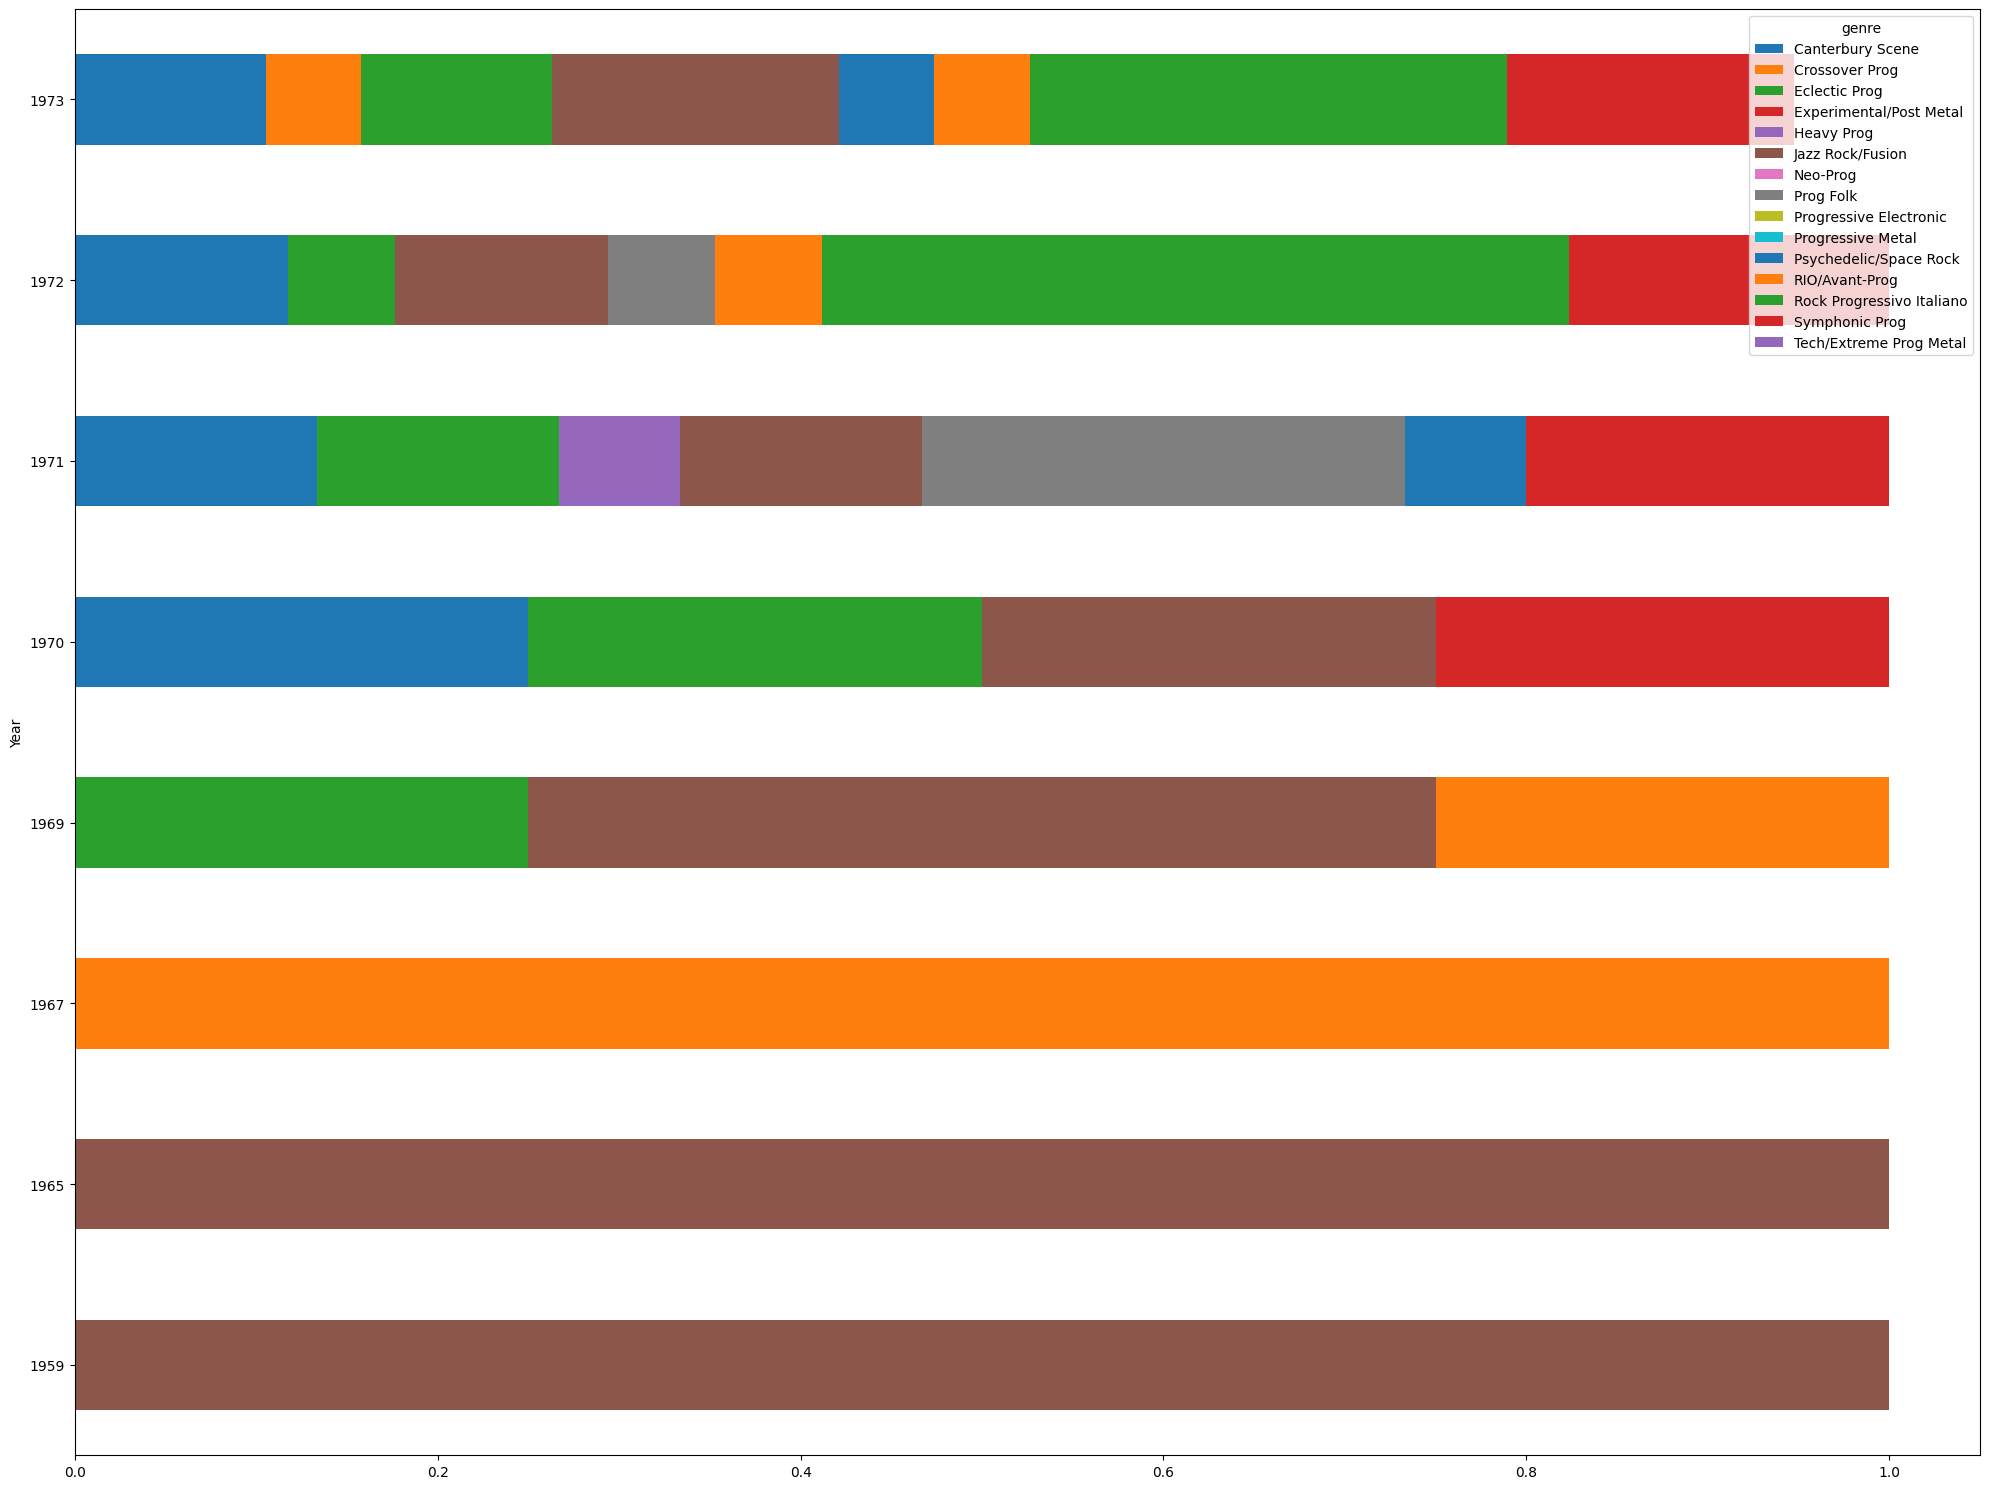

In [22]:
new_df = prog_archives.loc[:,['genre', 'year']]

new_df['year'] = new_df['year'].astype('str')

year_genre = pd.pivot_table(new_df, columns = ['genre'], index=['year'], aggfunc = len, fill_value=0)

year_genre['Total'] = year_genre.sum(axis = 1)

year_genre_fractions = year_genre.iloc[:,:-1].div(year_genre['Total'], axis =0)

year_genre_fractions.iloc[0:8, :-1].plot(kind = 'barh', stacked = True, figsize=(20,15), ylabel= 'proportion')

plt.ylabel('Year')

plt.tight_layout()

plt.savefig('figures/proportion_genres.pdf', dpi=800)

plt.show()